# Firm Dynamics Homework
Matthew Fitzgerald

## Exercise 1

A recursive competitive equilibrium is a set of $v^{\ast}(\epsilon, k)$, $C^{\ast}$, $N^{\ast}$, $w^{\ast}$, and $g^{\ast}(\epsilon, k)$ such that:
<br>
<br>
1.) **Firm Optimization:** Taking $w^{\ast}$ as given: $v^{\ast}(\epsilon, k)$ solves the Bellman equation.
<br>
<br>
2.) **Household Optimization:** Taking $w^{\ast}$ as given: $w^{\ast}(C^{\ast})^{-\sigma} = \chi(N^{\ast})^{\alpha}$
<br>
<br>
3.) **Market Clearing:**
<br>
<br>
4.) **Consistency:**

## Exercise 2


**Houhsehold's Problem:**
<br>

$$
\begin{equation*}
\begin{aligned}
& \underset{C_{t}, N_{t}, K_{t+1}}{\text{max}}
& & \mathbb{E}\sum_{t = 0}^{\infty} \beta^{t} (log(C_{t} + a N_{t}) \\
& \text{subject to}
& & C_{t} + (K_{t+1} - (1 - \delta) K_{t}) = w_{t} N_{t} + r_{t} K_{t} , \; \forall t
\end{aligned}
\end{equation*}
$$

Then the lagrangian is:

$$
\begin{align*}
\mathscr{L} = \mathbb{E}\sum_{t = 0}^{\infty} \beta^{t} (log(C_{t} + a N_{t}) - \lambda (C_{t} + (K_{t+1} - (1 - \delta) K_{t}) - w_{t} N_{t} - r_{t} K_{t})
\end{align*}
$$

The first order conditions are:

$$
\begin{align*}
\frac{\partial \mathscr{L}}{\partial C_{t}} = 0 \implies \lambda_{t} = \beta^{t} c_{t}^{-1}
\frac{\partial \mathscr{L}}{\partial N_{t}} = 0 \implies -\beta^{t} a + \lambda_{t}  = 0
\frac{\partial \mathscr{L}}{\partial K_{t+1}} = 0 \implies \lambda_{t} = \lambda_{t+1} ((1 - \delta) + r_{t+1})
\end{align*}
$$


Then note that 

$$
\begin{align*}
\frac{\partial \mathscr{L}}{\partial C_{t+1}} = 0 \implies \lambda_{t+1} = \beta^{t} c_{t+1}^{-1}
\end{align*}
$$

Then combining our expressions we get our Euler equation:

$$
\begin{align*}
C_{t} = \beta (C_{t+1})^{-1} ((1 - \delta) + r_{t+1})
\end{align*}
$$


**Firm's Problem:**



In [1]:
theta = 0.21
nu = 0.64
delta = 0.1
beta = 0.96
phi = 0.5
rho = 0.9
sigma = 0.02
Nbar = 0.6

rbar = (1/beta) - (1 - delta)
Kbar = (rbar/(Nbar**(nu)*theta))**(1/(theta - 1))
wbar = nu*Kbar**(theta)*Nbar**(nu - 1)
cbar =wbar*Nbar + rbar*Kbar - Kbar + (1 - delta)*Kbar

print(rbar, Kbar, wbar, cbar)

0.14166666666666672 1.0881001887382777 0.7829715643830996 0.5151204464939546


In [2]:
import numpy as np
from scipy.stats import norm

###Descritize idiosyncratic shocks using Tauchen's method
rho = 0.9
sigma = 0.02  #standard deviation of process error
n_epsilon = 10 #number of points

def Tauchen(n_epsilon, rho, sigma, m = 3):
    zmax = m*np.sqrt(sigma**(2)/(1 - rho**(2)))
    zmin = - m*np.sqrt(sigma**(2)/(1 - rho**(2)))
    z=[0]*n_epsilon
    ztilde = [0]*(n_epsilon-1)
    for i in range(n_epsilon-1):
        if i == 0:
            z[i] = zmin
        else:
            z[i] = zmin + ((zmax - zmin)/(n_epsilon-1))*(i)
    z[n_epsilon-1] = (zmax)
    for i in range(n_epsilon-1):
        ztilde[i] = (z[i+1] + z[i])/2
    pi = np.zeros([n_epsilon, n_epsilon])
    for i in range(n_epsilon):
        for j in range(n_epsilon):
            if j == 0:
                pi[i][j] = norm.cdf((ztilde[j] - rho*z[i])/sigma)
            elif j in range(1, n_epsilon-1):
                pi[i][j] = norm.cdf((ztilde[j] - rho*z[i])/sigma) - norm.cdf((ztilde[j-1] - rho*z[i])/sigma)
            elif j == (n_epsilon -1):
                pi[i][j] = 1 - norm.cdf((ztilde[j-1] - rho*z[i])/sigma)
    return z, pi

testz, testpi = Tauchen(n_epsilon, rho, sigma, m = 3)
print(testz)
print(testpi)




[-0.13764944032233709, -0.10706067580626218, -0.07647191129018727, -0.04588314677411236, -0.015294382258037448, 0.015294382258037448, 0.04588314677411237, 0.0764719112901873, 0.10706067580626219, 0.13764944032233709]
[[5.30478170e-01 4.15375002e-01 5.32885772e-02 8.56706028e-04
  1.54439460e-06 2.92857183e-10 5.66213743e-15 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.67966302e-02 4.93930466e-01 3.69971746e-01 3.87971726e-02
  5.03259844e-04 7.25892202e-07 1.09655174e-10 1.66533454e-15
  0.00000000e+00 0.00000000e+00]
 [3.71959075e-03 1.21954964e-01 5.23228103e-01 3.23146274e-01
  2.76615366e-02 2.89198006e-04 3.33562232e-07 4.01295663e-11
  4.44089210e-16 0.00000000e+00]
 [2.52812798e-05 5.78316444e-03 1.54270165e-01 5.43701344e-01
  2.76746317e-01 1.93110204e-02 1.62557651e-04 1.49849563e-07
  1.43532963e-11 1.11022302e-16]
 [2.82551739e-08 4.80546862e-05 8.83083400e-03 1.91241547e-01
  5.54230974e-01 2.32360418e-01 1.31987073e-02 8.93711456e-05
  6.58100220e-08 5.01743092e-12

## Exercise 3

Iteration: 0 10000
Iteration: 1 13663.826408292263
Iteration: 2 18.476434054345674
Iteration: 3 17.054839005634275
Iteration: 4 14.272832077016117
Iteration: 5 10.663175994762272
Iteration: 6 7.866655454740464
Iteration: 7 6.05360710294418
Iteration: 8 4.858791110891725
Iteration: 9 4.03942707732826
Iteration: 10 3.4262865113222025
Iteration: 11 2.959155331604425
Iteration: 12 2.59866919874254
Iteration: 13 2.3082719755161887
Iteration: 14 2.0717174696678704
Iteration: 15 1.8785567882372036
Iteration: 16 1.7127895179117283
Iteration: 17 1.5631412141111853
Iteration: 18 1.4316168853352522
Iteration: 19 1.3114860683709466
Iteration: 20 1.2042155142781152
Iteration: 21 1.105145892319756
Iteration: 22 1.0165728179435252
Iteration: 23 0.9342473397983966
Iteration: 24 0.8595908116263883
Iteration: 25 0.7914529627434762
Iteration: 26 0.7284549358309572
Iteration: 27 0.6709809366342082
Iteration: 28 0.6183545958089299
Iteration: 29 0.5696582937848869
Iteration: 30 0.5248927651070172
Iteration:

Iteration: 237 2.4040559231107684e-08
Iteration: 238 2.2155779385872337e-08
Iteration: 239 2.041876628213091e-08
Iteration: 240 1.8817935005763427e-08
Iteration: 241 1.7342608901864162e-08
Iteration: 242 1.59829483642688e-08
Iteration: 243 1.4729885211998498e-08
Iteration: 244 1.3575062210926918e-08
Iteration: 245 1.2510777332800225e-08
Iteration: 246 1.1529932390523375e-08
Iteration: 247 1.0625985691853102e-08
Iteration: 248 9.7929084137146e-09
Iteration: 249 9.02514439413096e-09
Iteration: 250 8.317573073318575e-09
Iteration: 251 7.665475343876473e-09
Iteration: 252 7.064502077321823e-09
Iteration: 253 6.5106451147516335e-09
Iteration: 254 6.000210537384355e-09
Iteration: 255 5.529794031151991e-09
Iteration: 256 5.096258179848516e-09
Iteration: 257 4.696711538147824e-09
Iteration: 258 4.328489353301353e-09
Iteration: 259 3.989135787870517e-09
Iteration: 260 3.676387542598319e-09
Iteration: 261 3.3881587591376442e-09
Iteration: 262 3.122527112512921e-09
Iteration: 263 2.87772098692966

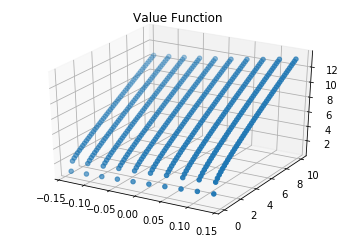

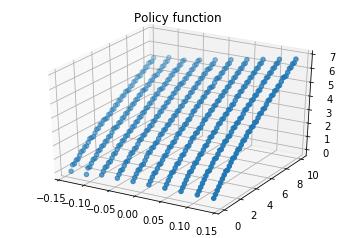

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import quantecon





wstar = 0.78297
cf = 0.01
varphi = 0.5
theta = 0.21
nu = 0.64
delta = 0.1
beta = 0.96
phi = 0.5
rho = 0.9
sigma = 0.02
Nbar = 0.6



def my_n(wbar, k, nu, epsilon, theta):
    n = (wbar/(nu*np.e**(epsilon)*k**(theta)))**(1/(nu-1))
    return n








#Define the value iteration function ValIter
def ValIter(num_points, params):


    #unwrap params
    varphi, theta, nu, delta, beta, phi, rho, sigma, wstar, cf = params
    #Set n_epsilon for Tauchen Method
    n_epsilon = 10
    #Set the threshold below which the value function is deemed to have converged
    threshold = 1e-10
    #Initialize the difference to be something large
    difference = 10000
    # number of grid-points for the capital grid
    N = num_points 
    # Set lower bound for captial
    k_low =  0.01
    # Set upper boud for capital
    k_high = 10
    #Create grid for capital based on user input
    k_grid = np.linspace(k_low, k_high, N)
    #Get grid of shocks and their transition probabilities
    shocks, transition = Tauchen(n_epsilon, rho, sigma, m = 3)
    # Now we initialize the value function by setting it to zero, two dimensional because two states
    V_old = np.zeros((len(shocks), N))  
    #Initialize the utility matrix
    obj = np.zeros_like(V_old)
    #Initialize V1
    V1 = np.zeros_like(V_old)
    #Initialize the new value function
    V_new = np.zeros_like(V_old)
    #Initialize the policy function
    policyfun = np.zeros_like(V_old)
    #Initialize a list in which to store the indicies of the max values for the policy function
    max_indicies = [0,0]
    

    
    itr = 0
    
    while difference > threshold:
        print("Iteration:", str(itr), str(difference) )
        for i in range(len(k_grid)):
            #Get value of capital in this period
            k = k_grid[i]
            #Compute n for objective function
            for j in range(len(shocks)):
                epsilon = shocks[j]
                n = my_n(wstar, k, nu, epsilon, theta)
                #Firm's objective function
                obj[j, :] = np.e**(epsilon)*k**(theta)*n**(nu) - wstar*n - (k_grid-(1-delta)*k) - (varphi/2)*((k_grid/k) - (1 - delta))**(2)*k
            #Compute function to be maximized over all future k given current capital k_grid[i]
            actionvalue_allchoices = obj + beta * np.dot(transition, V_old)
            V1[:, i] = np.max(actionvalue_allchoices, axis = 1)       
            max_indicies = np.argmax(actionvalue_allchoices, axis = 1)
            policyfun[:, i] = k_grid[max_indicies]
            
        arg1 = np.ones([V1.shape[0],1])*(1-delta)*k_grid           
        V_new = np.maximum(arg1, V1 - cf)
        policyfun[arg1 > V1 - cf] = 0
        difference = np.linalg.norm(V_new - V_old)**2
        V_old = V_new.copy()
        itr += 1
    
    #Now solve optimization problem deterimining firm entry
    mc = quantecon.MarkovChain(transition)
    stat_distr = mc.stationary_distributions
    V_E0 = -k_grid + np.dot(stat_distr, V_new)
    
    #TV_E0 = np.transpose(V_E0)
    #Complete_V = np.hstack((V_E0, V_new))

    
    return k_grid, shocks, V_new, policyfun, V_E0#, Complete_V
    

params = [varphi, theta, nu, delta, beta, phi, rho, sigma, wstar, cf]

k_grid, shocks, V_new, policy, V_E0  = ValIter(50, params)

k, eps = np.meshgrid(k_grid, shocks)

# print(shocks)
print(k_grid.shape, len(shocks), V_new.shape)

#ValIter(500)

fig = plt.figure()
#plt.gcf().subplots_adjust(right = 1.1)
ax1 = plt.axes(projection = "3d")
ax1.scatter(eps, k, V_new)
plt.title("Value Function")
plt.show()


fig = plt.figure()
ax2 = plt.axes(projection = "3d")
ax2.scatter(eps, k, policy)
# ax.set_xlabel("k")
# ax.set_ylabel("z")
# ax.set_zlabel("k'")
plt.title("Policy function")
plt.show()

# k_grid_new = np.insert(k_grid, 0, 0)

# k, eps = np.meshgrid(k_grid, shocks)



# print(Complete_V)






In [4]:
shocks, transition = Tauchen(n_epsilon, rho, sigma, m = 3)
mc = quantecon.MarkovChain(transition)
stat_distr = mc.stationary_distributions
V_E0 = -k_grid + np.dot(stat_distr, V_new)
V_E0.shape
TV_E0 = np.transpose(V_E0)
print(TV_E0.shape)
print(V_new.shape)
#Complete_V = np.hstack((V_E0, V_new))

(50, 1)
(10, 50)


In [7]:
k = 1
k_grid = 2
epsilon = shocks[1]
n = my_n(wstar, k, nu, epsilon, theta)
#Firm's objective function
np.e**(epsilon)*k**(theta)*n**(nu) - wstar*n - (k_grid-(1-delta)*k) - (varphi/2)*((k_grid/k) - (1 - delta))**(2)*k



-1.215657376092783